In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Save path to data set in a variable
data_file = "Resources/Hospital_Locations.csv"

# Use Pandas to read data
hospital_df = pd.read_csv(data_file)
hospital_df.head()

,X,Y,FID,LabelName,OpsName,Type,StreetNum,RoadName,RoadType,RoadSuffix,CampusCode,LGAName,LocalityNa,Postcode,VicgovRegi,State,ServiceNam
0,144.983399,-37.809681,1,East Melbourne Specialist Day Hospital,EAST MELBOURNE DAY HOSPITAL,PRIVATE,23,CLARENDON,STREET,,8280,MELBOURNE,,3002,NWMR,VIC,
1,145.149300,-37.951400,2,Windsor Avenue Day Surgery,WINDSOR AVENUE DAY SURGERY,PRIVATE,17,WINDSOR,AVENUE,,7050,GREATER DANDENONG,,3171,SMR,VIC,
2,145.344653,-38.034580,3,Hyperbaric Health Wound Centre Berwick,HYPERBARIC HEALTH - BERWICK,PRIVATE,3,GIBB,STREET,,7100,CASEY,,3806,SMR,VIC,
3,143.832286,-37.540553,4,Ballarat Day Procedure Centre,BALLARAT DAY PROCEDURE CENTRE,PRIVATE,1117-1123,HOWITT,STREET,,8430,BALLARAT,,3355,Gram,VIC,
4,145.143379,-38.148189,5,Bayside Day Procedure and Specialist Centre,BAYSIDE DAY PROCEDURE CENTRE,PRIVATE,141,CRANBOURNE,ROAD,,7310,FRANKSTON,,3199,SMR,VIC,


In [3]:
# Drop unnecessary columns
hospital_df.drop(["RoadSuffix", "CampusCode", "LocalityNa", "ServiceNam", "OpsName", "FID", "VicgovRegi"], axis=1, inplace=True)
hospital_df.head()

,X,Y,LabelName,Type,StreetNum,RoadName,RoadType,LGAName,Postcode,State
0,144.983399,-37.809681,East Melbourne Specialist Day Hospital,PRIVATE,23,CLARENDON,STREET,MELBOURNE,3002,VIC
1,145.149300,-37.951400,Windsor Avenue Day Surgery,PRIVATE,17,WINDSOR,AVENUE,GREATER DANDENONG,3171,VIC
2,145.344653,-38.034580,Hyperbaric Health Wound Centre Berwick,PRIVATE,3,GIBB,STREET,CASEY,3806,VIC
3,143.832286,-37.540553,Ballarat Day Procedure Centre,PRIVATE,1117-1123,HOWITT,STREET,BALLARAT,3355,VIC
4,145.143379,-38.148189,Bayside Day Procedure and Specialist Centre,PRIVATE,141,CRANBOURNE,ROAD,FRANKSTON,3199,VIC


In [4]:
# Split LGA Name
hospital_df["LGAName"] = hospital_df.LGAName.apply(lambda x: pd.Series(str(x).split(" "))) 

In [5]:
# Capitalise and lower LGA names
hospital_df["LGAName"] = hospital_df.LGAName.apply(lambda x: pd.Series(str(x).lower().title()))

In [6]:
# Rename columns of hospital df
hospital_df = hospital_df.rename(columns={"X":"Latitude", 
                                          "Y":"Longitude", 
                                          "LabelName": "Hospital Name",
                                          "Type": "Hospital Type",
                                          "StreetNum": "Street Number",
                                          "RoadName": "Road Name",
                                          "RoadType": "Road Type",
                                          "LGAName": "Local Government Area",
                                            "LGA_Name": "LGA Name"
                                         })
hospital_df.head()

,Latitude,Longitude,Hospital Name,Hospital Type,Street Number,Road Name,Road Type,Local Government Area,Postcode,State
0,144.983399,-37.809681,East Melbourne Specialist Day Hospital,PRIVATE,23,CLARENDON,STREET,Melbourne,3002,VIC
1,145.149300,-37.951400,Windsor Avenue Day Surgery,PRIVATE,17,WINDSOR,AVENUE,Greater,3171,VIC
2,145.344653,-38.034580,Hyperbaric Health Wound Centre Berwick,PRIVATE,3,GIBB,STREET,Casey,3806,VIC
3,143.832286,-37.540553,Ballarat Day Procedure Centre,PRIVATE,1117-1123,HOWITT,STREET,Ballarat,3355,VIC
4,145.143379,-38.148189,Bayside Day Procedure and Specialist Centre,PRIVATE,141,CRANBOURNE,ROAD,Frankston,3199,VIC


In [7]:
# Grouby Local Government Area
grouped_hospital = hospital_df.groupby('Local Government Area')

# Find number of hospital in each LGA
hospital_count = grouped_hospital["Hospital Name"].count()

# Create a new df with hospital count
hospital_count = hospital_count.reset_index()


# Rename column
hospital_count = hospital_count.rename(columns={"Hospital Name": "Hospital Count per LGA"})
hospital_count.head()

,Local Government Area,Hospital Count per LGA
0,Albury,1
1,Alpine,3
2,Ararat,2
3,Ballarat,5
4,Banyule,8


In [8]:
# Import pre-covid housing data
pre_covid_sales_file = "./MT_resources/vic-sales-precovid.csv"
pre_covid_sales = pd.read_csv(pre_covid_sales_file)
pre_covid_sales

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,0,2018-09-02,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0
1,1,2018-09-02,460000.0,Rosebud,Melbourne,VIC,-38.389428,144.924085,3,house,VIC2199,VIC125,3939.0
2,2,2018-09-02,450000.0,Cheltenham,Melbourne,VIC,-37.964607,145.053552,2,unit,VIC537,VIC98,3192.0
3,3,2018-09-02,575000.0,Keysborough,Melbourne,VIC,-38.004906,145.165695,2,townhouse,VIC1334,VIC91,3173.0
4,4,2018-09-02,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161,3810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45700,45700,2020-01-31,626500.0,Wollert,Melbourne,VIC,-37.609187,145.020637,4,house,VIC2821,VIC114,3750.0
45701,45701,2020-01-31,612500.0,Rosebud,Melbourne,VIC,-38.381654,144.925493,3,house,VIC2199,VIC125,3939.0
45702,45702,2020-01-31,592500.0,Croydon,Melbourne,VIC,-37.794486,145.290692,3,house,VIC680,VIC139,3136.0
45703,45703,2020-01-31,424050.0,Wollert,Melbourne,VIC,-37.609029,145.018557,3,house,VIC2821,VIC114,3750.0


In [9]:
# Load in the LGA with postcodes
suburb_lga = pd.read_csv("./output/suburb_lga_df.csv")

# Rename column
suburb_lga = suburb_lga.rename(columns={"Suburb": "suburb","LGA_Name": "Local Government Area"})
suburb_lga.head()

,suburb,Local Government Area
0,Alberton,Wellington
1,Allansford,Warrnambool
2,Avoca,Pyrenees
3,Avenel,Strathbogie
4,Warrandyte,Manningham


In [10]:
# Add LGA names into pre_covid_sales
pre_covid_sales_df = pd.merge(pre_covid_sales, suburb_lga, how="inner", on="suburb")
# Rename column

pre_covid_sales_df = pre_covid_sales_df.rename(columns={"LGA_Name": "suburb"})
pre_covid_sales_df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode,Local Government Area
0,0,2018-09-02,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0,Glen
1,7,2018-09-02,2600000.0,Elsternwick,Melbourne,VIC,-37.892268,145.006864,5,house,VIC857,VIC89,3185.0,Glen
2,92,2018-09-04,1300000.0,Elsternwick,Melbourne,VIC,-37.877794,145.002893,3,house,VIC857,VIC89,3185.0,Glen
3,275,2018-09-05,1300000.0,Elsternwick,Melbourne,VIC,-37.895319,145.011912,3,house,VIC857,VIC89,3185.0,Glen
4,378,2018-09-06,422000.0,Elsternwick,Melbourne,VIC,-37.890528,145.003799,2,unit,VIC857,VIC89,3185.0,Glen


In [11]:
# Merge hospital counts into pre-covid housing data
merged_pre_covid = pd.merge(hospital_count, pre_covid_sales_df, how="inner", on="Local Government Area")
merged_pre_covid

,Local Government Area,Hospital Count per LGA,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,Banyule,8,64,2018-09-03,1200000.0,Ivanhoe,Melbourne,VIC,-37.762100,145.048069,2,house,VIC1239,VIC165,3079.0
1,Banyule,8,255,2018-09-05,1132000.0,Ivanhoe,Melbourne,VIC,-37.758217,145.046212,3,townhouse,VIC1239,VIC165,3079.0
2,Banyule,8,738,2018-09-08,2157000.0,Ivanhoe,Melbourne,VIC,-37.760677,145.052323,5,house,VIC1239,VIC165,3079.0
3,Banyule,8,933,2018-09-11,675000.0,Ivanhoe,Melbourne,VIC,-37.770648,145.040267,2,unit,VIC1239,VIC165,3079.0
4,Banyule,8,1092,2018-09-13,515000.0,Ivanhoe,Melbourne,VIC,-37.759542,145.047422,2,unit,VIC1239,VIC165,3079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,Yarra,7,35073,2019-10-22,975000.0,Silvan,Melbourne,VIC,-37.813959,145.433615,3,house,VIC2286,VIC129,3795.0
52581,Yarra,7,38861,2019-11-19,1150000.0,Silvan,Melbourne,VIC,-37.850426,145.456386,3,house,VIC2286,VIC129,3795.0
52582,Yarra,7,42361,2019-12-13,830000.0,Silvan,Melbourne,VIC,-37.835232,145.458203,2,house,VIC2286,VIC129,3795.0
52583,Yarra,7,3734,2018-10-12,702000.0,Gladysdale,Melbourne,VIC,-37.825931,145.654936,4,house,VIC995,VIC129,3797.0


In [12]:
# Check pre covid data for nulls
merged_pre_covid.count()

Local Government Area     52585
Hospital Count per LGA    52585
Unnamed: 0                52585
date_sold                 52585
price                     52585
suburb                    52585
city_name                 52585
state                     52585
lat                       52585
lon                       52585
bedrooms                  52585
property_type             52585
loc_pid                   52585
lga_pid                   52585
Postcode                  52585
dtype: int64

In [13]:
# Drop null values
merged_pre_covid = merged_pre_covid.dropna()
merged_pre_covid

,Local Government Area,Hospital Count per LGA,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,Banyule,8,64,2018-09-03,1200000.0,Ivanhoe,Melbourne,VIC,-37.762100,145.048069,2,house,VIC1239,VIC165,3079.0
1,Banyule,8,255,2018-09-05,1132000.0,Ivanhoe,Melbourne,VIC,-37.758217,145.046212,3,townhouse,VIC1239,VIC165,3079.0
2,Banyule,8,738,2018-09-08,2157000.0,Ivanhoe,Melbourne,VIC,-37.760677,145.052323,5,house,VIC1239,VIC165,3079.0
3,Banyule,8,933,2018-09-11,675000.0,Ivanhoe,Melbourne,VIC,-37.770648,145.040267,2,unit,VIC1239,VIC165,3079.0
4,Banyule,8,1092,2018-09-13,515000.0,Ivanhoe,Melbourne,VIC,-37.759542,145.047422,2,unit,VIC1239,VIC165,3079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,Yarra,7,35073,2019-10-22,975000.0,Silvan,Melbourne,VIC,-37.813959,145.433615,3,house,VIC2286,VIC129,3795.0
52581,Yarra,7,38861,2019-11-19,1150000.0,Silvan,Melbourne,VIC,-37.850426,145.456386,3,house,VIC2286,VIC129,3795.0
52582,Yarra,7,42361,2019-12-13,830000.0,Silvan,Melbourne,VIC,-37.835232,145.458203,2,house,VIC2286,VIC129,3795.0
52583,Yarra,7,3734,2018-10-12,702000.0,Gladysdale,Melbourne,VIC,-37.825931,145.654936,4,house,VIC995,VIC129,3797.0


In [14]:
# Groupby on LGA
grouped_lga_df = merged_pre_covid.groupby(["Local Government Area"])

# Normalise housing prices in each suburb by finding the average purchase
grouped_lga_df = round(grouped_lga_df[["Hospital Count per LGA", "price"]].mean(),2)

grouped_lga_df

,Hospital Count per LGA,price
Local Government Area,,
Banyule,8,810042.38
Bayside,7,1321620.83
Boroondara,14,1634740.24
Brimbank,7,611651.84
Cardinia,1,551932.85
Casey,10,621201.47
Darebin,6,820274.61
Frankston,8,630809.48
Glen,12,1002071.53


In [15]:
# Filter out the outliers
filtered = grouped_lga_df.loc[grouped_lga_df["Hospital Count per LGA"] < 20, :]
filtered_data = filtered.loc[filtered["price"] < 1500000, :]
filtered_data

,Hospital Count per LGA,price
Local Government Area,,
Banyule,8,810042.38
Bayside,7,1321620.83
Brimbank,7,611651.84
Cardinia,1,551932.85
Casey,10,621201.47
Darebin,6,820274.61
Frankston,8,630809.48
Glen,12,1002071.53
Hobsons,2,759125.86


In [16]:
# Rename columns of hospital df
filtered_data = filtered_data.rename(columns={"price":"House Price (million $)"})
filtered_data

,Hospital Count per LGA,House Price (million $)
Local Government Area,,
Banyule,8,810042.38
Bayside,7,1321620.83
Brimbank,7,611651.84
Cardinia,1,551932.85
Casey,10,621201.47
Darebin,6,820274.61
Frankston,8,630809.48
Glen,12,1002071.53
Hobsons,2,759125.86


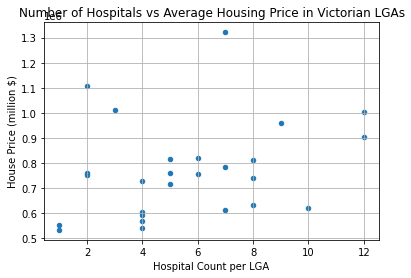

In [17]:
# Visualise
filtered_data.plot(kind="scatter", x="Hospital Count per LGA", y="House Price (million $)", grid=True, title="Number of Hospitals vs Average Housing Price in Victorian LGAs")

In [18]:
# Linear regression function
def create_linear_regression_plot(x_values, y_values, x_label, y_label, period, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    
    # Using pyplot to create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim != None:
        plt.ylim = (0, ylim)
    plt.title(f'{period} covid - {x_label} vs. {y_label}')
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Print correlation between both factors
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save linear regression plot as png file
    #plt.savefig(f"./output/{period}_{x_label}_vs_{y_label}.png")
    
    return plt.plot(x_values,regress_values,"r-")

The r-squared is: 0.08410507608477118
The correlation between both factors is 0.29


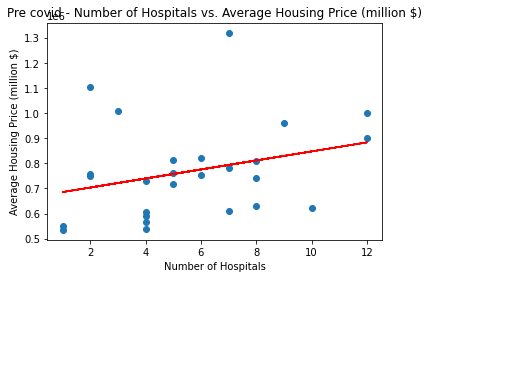

In [21]:
# Plot data with regression line
x_values = filtered_data["Hospital Count per LGA"]
y_values = filtered_data["House Price (million $)"]
create_linear_regression_plot(x_values, y_values, "Number of Hospitals", "Average Housing Price (million $)", "Pre", (10,1.5), ylim=None)